In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('dark_background')

In [99]:
df=pd.read_csv('../input/zomato-bangalore-restaurants/zomato.csv')
df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [100]:
df.shape

(51717, 17)

In [101]:
df.columns

Index(['url', 'address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'phone', 'location', 'rest_type', 'dish_liked', 'cuisines',
       'approx_cost(for two people)', 'reviews_list', 'menu_item',
       'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [102]:
df=df.drop(['url','address','phone','menu_item','dish_liked','reviews_list'],axis=1)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [103]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         51717 non-null  object
 1   online_order                 51717 non-null  object
 2   book_table                   51717 non-null  object
 3   rate                         43942 non-null  object
 4   votes                        51717 non-null  int64 
 5   location                     51696 non-null  object
 6   rest_type                    51490 non-null  object
 7   cuisines                     51672 non-null  object
 8   approx_cost(for two people)  51371 non-null  object
 9   listed_in(type)              51717 non-null  object
 10  listed_in(city)              51717 non-null  object
dtypes: int64(1), object(10)
memory usage: 4.3+ MB


In [104]:
df.isnull().sum()

name                              0
online_order                      0
book_table                        0
rate                           7775
votes                             0
location                         21
rest_type                       227
cuisines                         45
approx_cost(for two people)     346
listed_in(type)                   0
listed_in(city)                   0
dtype: int64

In [105]:
df.drop_duplicates(inplace=True)

In [106]:
df.shape

(51609, 11)

In [107]:
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', nan, '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [108]:
def handlerate(value):
    if(value=='NEW'or value=='nan'or value=='-'):
        return np.nan
    else:
        value=str(value).split('/')
        value=value[0]
        return float(value)
df['rate']=df['rate'].apply(handlerate)
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [109]:
df['rate'].isnull().sum()

10019

In [110]:
df['rate'].fillna(df['rate'].mean(),inplace=True)

In [111]:
df['rate'].isnull().sum()

0

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51609 entries, 0 to 51716
Data columns (total 11 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         51609 non-null  object 
 1   online_order                 51609 non-null  object 
 2   book_table                   51609 non-null  object 
 3   rate                         51609 non-null  float64
 4   votes                        51609 non-null  int64  
 5   location                     51588 non-null  object 
 6   rest_type                    51382 non-null  object 
 7   cuisines                     51564 non-null  object 
 8   approx_cost(for two people)  51265 non-null  object 
 9   listed_in(type)              51609 non-null  object 
 10  listed_in(city)              51609 non-null  object 
dtypes: float64(1), int64(1), object(9)
memory usage: 4.7+ MB


In [113]:
df.dropna(inplace=True)
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),listed_in(type),listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [114]:
df.shape

(51042, 11)

In [115]:
df.rename(columns={'approx_cost(for two people)':'Cost2plates','listed_in(type)':'Type'},inplace=True)

In [116]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,Buffet,Banashankari


In [117]:
df['Cost2plates'].unique()

array(['800', '300', '600', '700', '550', '500', '450', '650', '400',
       '900', '200', '750', '150', '850', '100', '1,200', '350', '250',
       '950', '1,000', '1,500', '1,300', '199', '80', '1,100', '160',
       '1,600', '230', '130', '50', '190', '1,700', '1,400', '180',
       '1,350', '2,200', '2,000', '1,800', '1,900', '330', '2,500',
       '2,100', '3,000', '2,800', '3,400', '40', '1,250', '3,500',
       '4,000', '2,400', '2,600', '120', '1,450', '469', '70', '3,200',
       '60', '560', '240', '360', '6,000', '1,050', '2,300', '4,100',
       '5,000', '3,700', '1,650', '2,700', '4,500', '140'], dtype=object)

In [118]:
def handlecomma(value):
    value=str(value)
    if ',' in value:
        value=value.replace(',','')
        return float(value)
    else:
        return float(value)

df['Cost2plates']=df['Cost2plates'].apply(handlecomma)
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [119]:
df['Cost2plates'].unique()

array([ 800.,  300.,  600.,  700.,  550.,  500.,  450.,  650.,  400.,
        900.,  200.,  750.,  150.,  850.,  100., 1200.,  350.,  250.,
        950., 1000., 1500., 1300.,  199.,   80., 1100.,  160., 1600.,
        230.,  130.,   50.,  190., 1700., 1400.,  180., 1350., 2200.,
       2000., 1800., 1900.,  330., 2500., 2100., 3000., 2800., 3400.,
         40., 1250., 3500., 4000., 2400., 2600.,  120., 1450.,  469.,
         70., 3200.,   60.,  560.,  240.,  360., 6000., 1050., 2300.,
       4100., 5000., 3700., 1650., 2700., 4500.,  140.])

In [120]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


In [121]:
df['rest_type'].unique()

array(['Casual Dining', 'Cafe, Casual Dining', 'Quick Bites',
       'Casual Dining, Cafe', 'Cafe', 'Quick Bites, Cafe',
       'Cafe, Quick Bites', 'Delivery', 'Mess', 'Dessert Parlor',
       'Bakery, Dessert Parlor', 'Pub', 'Bakery', 'Takeaway, Delivery',
       'Fine Dining', 'Beverage Shop', 'Sweet Shop', 'Bar',
       'Beverage Shop, Quick Bites', 'Confectionery',
       'Quick Bites, Beverage Shop', 'Dessert Parlor, Sweet Shop',
       'Bakery, Quick Bites', 'Sweet Shop, Quick Bites', 'Kiosk',
       'Food Truck', 'Quick Bites, Dessert Parlor',
       'Beverage Shop, Dessert Parlor', 'Takeaway', 'Pub, Casual Dining',
       'Casual Dining, Bar', 'Dessert Parlor, Beverage Shop',
       'Quick Bites, Bakery', 'Dessert Parlor, Quick Bites',
       'Microbrewery, Casual Dining', 'Lounge', 'Bar, Casual Dining',
       'Food Court', 'Cafe, Bakery', 'Dhaba', 'Quick Bites, Sweet Shop',
       'Microbrewery', 'Food Court, Quick Bites', 'Pub, Bar',
       'Casual Dining, Pub', 'Lounge, Ba

In [122]:
df['rest_type'].value_counts()

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [123]:
rest_types=df['rest_type'].value_counts(ascending=False)
rest_types

Quick Bites                   19010
Casual Dining                 10253
Cafe                           3682
Delivery                       2574
Dessert Parlor                 2242
                              ...  
Dessert Parlor, Kiosk             2
Food Court, Beverage Shop         2
Dessert Parlor, Food Court        2
Quick Bites, Kiosk                1
Sweet Shop, Dessert Parlor        1
Name: rest_type, Length: 93, dtype: int64

In [124]:
rest_types_lessthan1000=rest_types[rest_types<1000]
rest_types_lessthan1000

Beverage Shop                 863
Bar                           686
Food Court                    616
Sweet Shop                    468
Bar, Casual Dining            411
                             ... 
Dessert Parlor, Kiosk           2
Food Court, Beverage Shop       2
Dessert Parlor, Food Court      2
Quick Bites, Kiosk              1
Sweet Shop, Dessert Parlor      1
Name: rest_type, Length: 85, dtype: int64

# Making the less than 1000 rest_types as others

In [125]:
def handle_rest_types(value):
    if(value in rest_types_lessthan1000):
        return 'others'
    else:
        return value
df['rest_type']=df['rest_type'].apply(handle_rest_types)
df['rest_type'].value_counts()

Quick Bites           19010
Casual Dining         10253
others                 9003
Cafe                   3682
Delivery               2574
Dessert Parlor         2242
Takeaway, Delivery     2008
Bakery                 1140
Casual Dining, Bar     1130
Name: rest_type, dtype: int64

In [126]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Cleaning location Column

In [127]:
df['location'].value_counts()

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [128]:
location=df['location'].value_counts(ascending=False)
location

BTM                      5056
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
                         ... 
West Bangalore              6
Yelahanka                   5
Jakkur                      3
Rajarajeshwari Nagar        2
Peenya                      1
Name: location, Length: 93, dtype: int64

In [129]:
location_lessthan300=location[location<300]

def handle_location(value):
    if(value in location_lessthan300):
        return 'others'
    else:
        return value
df['location']=df['location'].apply(handle_location)
df['location'].value_counts()

BTM                      5056
others                   4954
HSR                      2494
Koramangala 5th Block    2479
JP Nagar                 2218
Whitefield               2105
Indiranagar              2026
Jayanagar                1916
Marathahalli             1805
Bannerghatta Road        1609
Bellandur                1268
Electronic City          1246
Koramangala 1st Block    1236
Brigade Road             1210
Koramangala 7th Block    1174
Koramangala 6th Block    1127
Sarjapur Road            1047
Koramangala 4th Block    1017
Ulsoor                   1011
Banashankari              902
MG Road                   893
Kalyan Nagar              841
Richmond Road             803
Malleshwaram              721
Frazer Town               714
Basavanagudi              684
Residency Road            671
Brookefield               656
New BEL Road              644
Banaswadi                 640
Kammanahalli              639
Rajajinagar               591
Church Street             566
Lavelle Ro

In [130]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,"Cafe, Mexican, Italian",800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet,Banashankari


# Cleaning Cuisines Column

In [131]:
df['cuisines'].value_counts()

North Indian                                2852
North Indian, Chinese                       2351
South Indian                                1820
Biryani                                      903
Bakery, Desserts                             898
                                            ... 
North Indian, Chinese, Oriya, Mithai           1
Beverages, Burger                              1
North Indian, Mughlai, Lucknowi                1
Continental, Thai, North Indian, Chinese       1
North Indian, Chinese, Arabian, Momos          1
Name: cuisines, Length: 2704, dtype: int64

In [132]:
cuisines=df['cuisines'].value_counts(ascending=False)
cuisines_lessthan100=cuisines[cuisines<100]

def handle_cuisines(value):
    if(value in cuisines_lessthan100):
        return 'others'
    else:
        return value
df['cuisines']=df['cuisines'].apply(handle_cuisines)
df['cuisines'].value_counts()


others                                 26159
North Indian                            2852
North Indian, Chinese                   2351
South Indian                            1820
Biryani                                  903
                                       ...  
South Indian, Chinese, North Indian      105
North Indian, Mughlai, Chinese           104
South Indian, Fast Food                  104
Italian, Pizza                           102
North Indian, Chinese, Seafood           102
Name: cuisines, Length: 70, dtype: int64

In [133]:
df.head()

,name,online_order,book_table,rate,votes,location,rest_type,cuisines,Cost2plates,Type,listed_in(city)
0,Jalsa,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet,Banashankari
1,Spice Elephant,Yes,No,4.1,787,Banashankari,Casual Dining,others,800.0,Buffet,Banashankari
2,San Churro Cafe,Yes,No,3.8,918,Banashankari,others,others,800.0,Buffet,Banashankari
3,Addhuri Udupi Bhojana,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet,Banashankari
4,Grand Village,No,No,3.8,166,Basavanagudi,Casual Dining,others,600.0,Buffet,Banashankari


In [134]:
df['Type'].value_counts()

Delivery              25579
Dine-out              17562
Desserts               3559
Cafes                  1703
Drinks & nightlife     1084
Buffet                  869
Pubs and bars           686
Name: Type, dtype: int64

# Visualization

## CountPlot of locations

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41]),
 [Text(0, 0, 'Banashankari'),
  Text(1, 0, 'Basavanagudi'),
  Text(2, 0, 'others'),
  Text(3, 0, 'Jayanagar'),
  Text(4, 0, 'JP Nagar'),
  Text(5, 0, 'Bannerghatta Road'),
  Text(6, 0, 'BTM'),
  Text(7, 0, 'Electronic City'),
  Text(8, 0, 'HSR'),
  Text(9, 0, 'Marathahalli'),
  Text(10, 0, 'Shanti Nagar'),
  Text(11, 0, 'Koramangala 5th Block'),
  Text(12, 0, 'Richmond Road'),
  Text(13, 0, 'Koramangala 7th Block'),
  Text(14, 0, 'Koramangala 4th Block'),
  Text(15, 0, 'Bellandur'),
  Text(16, 0, 'Sarjapur Road'),
  Text(17, 0, 'Whitefield'),
  Text(18, 0, 'Old Airport Road'),
  Text(19, 0, 'Indiranagar'),
  Text(20, 0, 'Koramangala 1st Block'),
  Text(21, 0, 'Frazer Town'),
  Text(22, 0, 'MG Road'),
  Text(23, 0, 'Brigade Road'),
  Text(24, 0, 'Lavelle Road'),
  Text(25, 0, 'Church Street'),
  

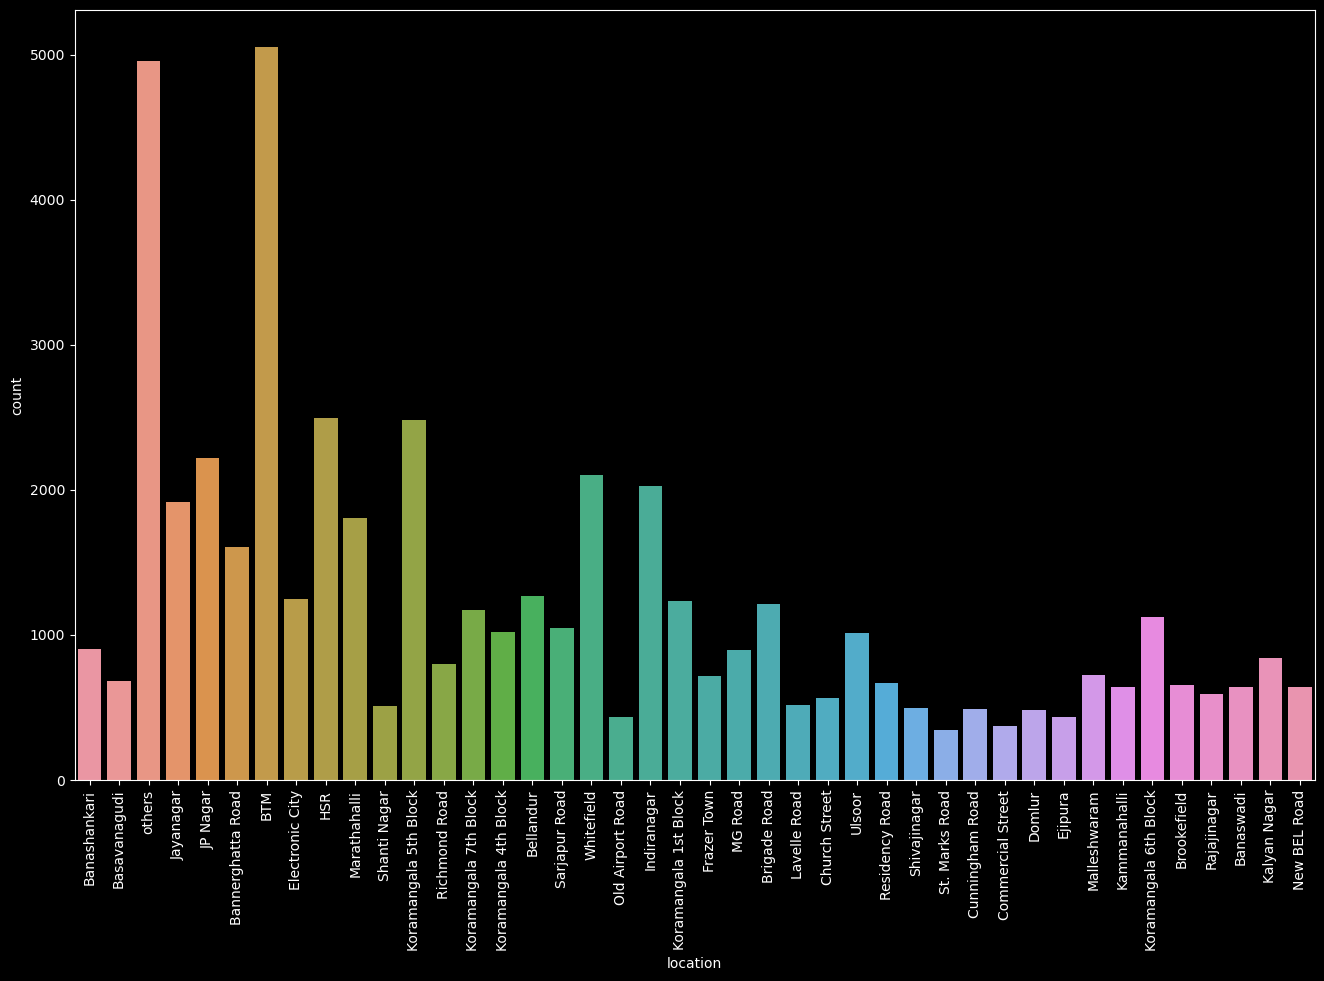

In [135]:
df['location']
plt.figure(figsize=(16,10))
ax= sns.countplot(x=df["location"])
plt.xticks(rotation=90)

this emplies that the resturant should not be open at BTM as their are already many resturants present their

## Visulizing book table

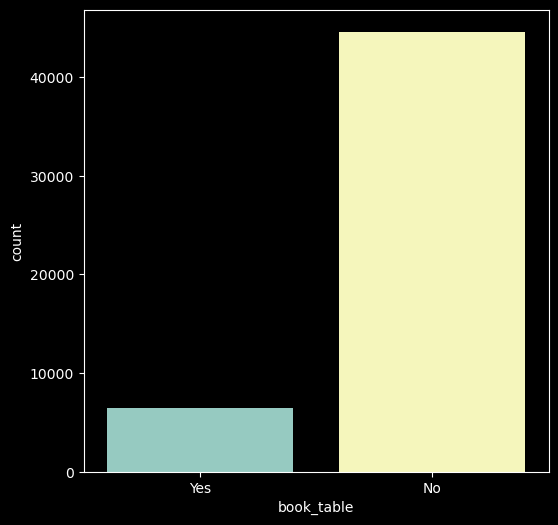

In [136]:
plt.figure(figsize=(6,6))
ax= sns.countplot(x=df["book_table"])

In [137]:
(df['book_table'].value_counts()[1]/df['book_table'].count())*100

12.570040358920103

=>only 12.57% resturants have book table facility

## Visualizing online order

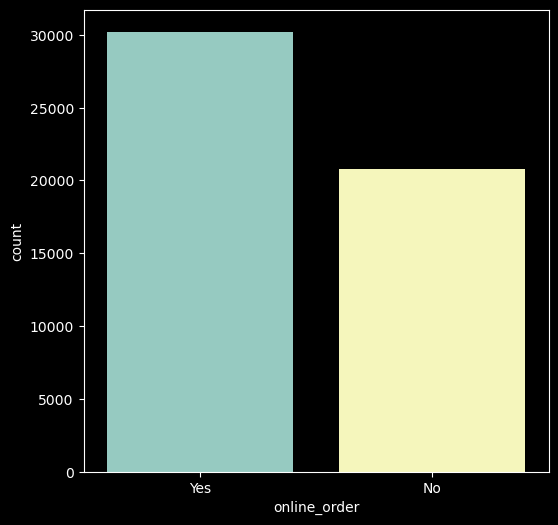

In [138]:
plt.figure(figsize=(6,6))
ax= sns.countplot(x=df["online_order"])

In [139]:
(df['online_order'].value_counts()[0]/df['online_order'].count())*100

59.22181732690726

=>only 59% resturants have online order facility

## Visulizing online order vs rate

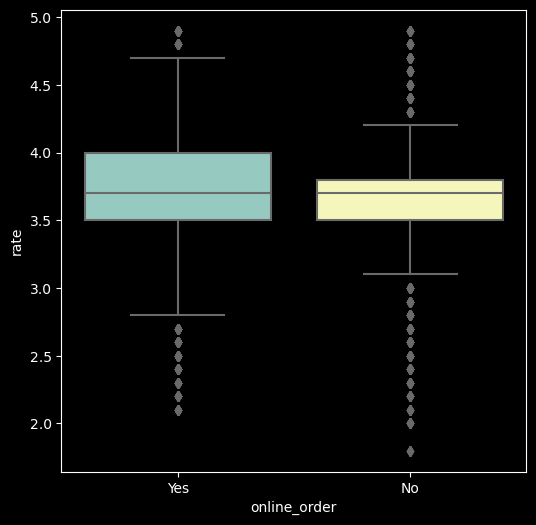

In [140]:
plt.figure(figsize=(6,6))
ax= sns.boxplot(x=df["online_order"],y=df['rate'])

=>Resturanats having online order facility have max rate higher than the restursnts not having online order facility

## Visualizing Book table vs Rate

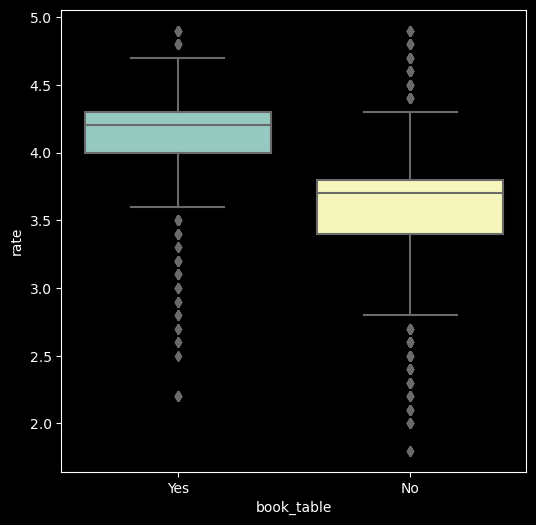

In [141]:
plt.figure(figsize=(6,6))
ax= sns.boxplot(x=df["book_table"],y=df['rate'])

Resturants having book table facility have higher avg rating

## Visualising Online order,location wise

In [142]:
df1=df.groupby(['location','online_order'])['name'].count()
print(df1)
df1.to_csv('location_online.csv')
df1=pd.read_csv('location_online.csv')
df1=pd.pivot_table(df1,values=None,index='location',columns=['online_order'])
df1


location      online_order
BTM           No              1763
              Yes             3293
Banashankari  No               397
              Yes              505
Banaswadi     No               302
                              ... 
Ulsoor        Yes              622
Whitefield    No               986
              Yes             1119
others        No              2064
              Yes             2890
Name: name, Length: 84, dtype: int64


name      
online_order             No   Yes
location                         
BTM                    1763  3293
Banashankari            397   505
Banaswadi               302   338
Bannerghatta Road       685   924
Basavanagudi            243   441
Bellandur               517   751
Brigade Road            552   658
Brookefield             239   417
Church Street           226   340
Commercial Street       228   142
Cunningham Road         168   322
Domlur                  247   235
Ejipura                 214   219
Electronic City         676   570
Frazer Town             287   427
HSR                     584  1910
Indiranagar             697  1329
JP Nagar                911  1307
Jayanagar               552  1364
Kalyan Nagar            350   491
Kammanahalli            264   375
Koramangala 1st Block   384   852
Koramangala 4th Block   459   558
Koramangala 5th Block   866  1613
Koramangala 6th Block   445   682
Koramangala 7th Block   389   785
Lavelle Road            315   203
MG Road                 520   373
Malleshwaram            309   412
Marathahalli            701  1104
New BEL Road            255   389
Old Airport Road        221   216
Rajajinagar             286   305
Residency Road          424   247
Richmond Road           557   246
Sarjapur Road           323   724
Shanti Nagar            289   219
Shivajinagar            354   144
St. Marks Road          176   167
Ulsoor                  389   622
Whitefield              986  1119
others                 2064  2890

<Axes: xlabel='location'>

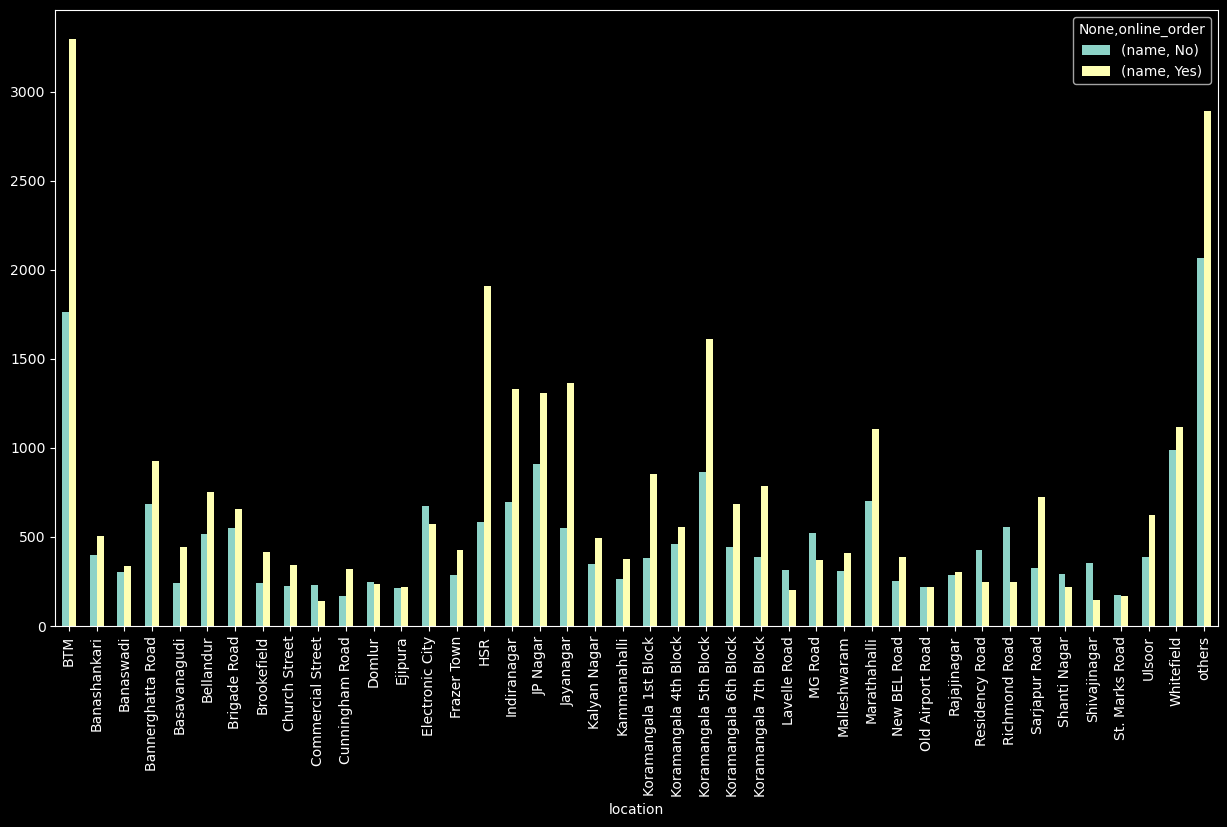

In [143]:
df1.plot(kind='bar',figsize=(15,8))

=>In BTM majority resturants provide online order
In lavelle road majority Resturants do not provide online order facility thus good place to open non online resturant

## Visualiziing book table facility, location wise

In [144]:
df2=df.groupby(['location','book_table'])['name'].count()
print(df2)
df2.to_csv('location_booktable.csv')
df2=pd.read_csv('location_booktable.csv')
df2=pd.pivot_table(df2,values=None,index='location',columns=['book_table'])
df2


location      book_table
BTM           No            4889
              Yes            167
Banashankari  No             839
              Yes             63
Banaswadi     No             632
                            ... 
Ulsoor        Yes            177
Whitefield    No            1852
              Yes            253
others        No            4587
              Yes            367
Name: name, Length: 82, dtype: int64


name       
book_table                 No    Yes
location                            
BTM                    4889.0  167.0
Banashankari            839.0   63.0
Banaswadi               632.0    8.0
Bannerghatta Road      1510.0   99.0
Basavanagudi            668.0   16.0
Bellandur              1170.0   98.0
Brigade Road           1034.0  176.0
Brookefield             582.0   74.0
Church Street           385.0  181.0
Commercial Street       370.0    NaN
Cunningham Road         315.0  175.0
Domlur                  427.0   55.0
Ejipura                 433.0    NaN
Electronic City        1148.0   98.0
Frazer Town             706.0    8.0
HSR                    2277.0  217.0
Indiranagar            1578.0  448.0
JP Nagar               1903.0  315.0
Jayanagar              1637.0  279.0
Kalyan Nagar            692.0  149.0
Kammanahalli            590.0   49.0
Koramangala 1st Block  1186.0   50.0
Koramangala 4th Block   695.0  322.0
Koramangala 5th Block  1787.0  692.0
Koramangala 6th Block  1015.0  112.0
Koramangala 7th Block  1012.0  162.0
Lavelle Road            290.0  228.0
MG Road                 546.0  347.0
Malleshwaram            632.0   89.0
Marathahalli           1642.0  163.0
New BEL Road            588.0   56.0
Old Airport Road        378.0   59.0
Rajajinagar             550.0   41.0
Residency Road          522.0  149.0
Richmond Road           687.0  116.0
Sarjapur Road           893.0  154.0
Shanti Nagar            451.0   57.0
Shivajinagar            475.0   23.0
St. Marks Road          219.0  124.0
Ulsoor                  834.0  177.0
Whitefield             1852.0  253.0
others                 4587.0  367.0

<Axes: xlabel='location'>

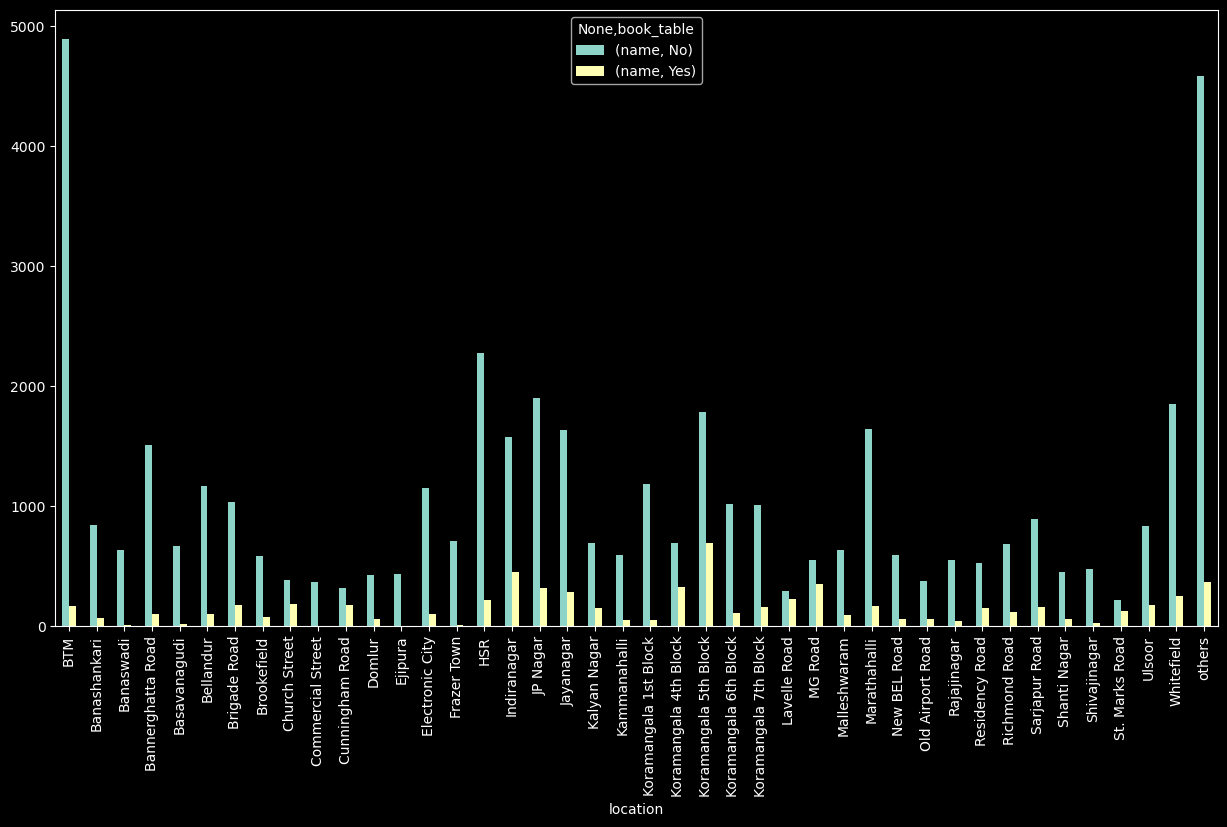

In [145]:
df2.plot(kind='bar',figsize=(15,8))

=> In BTM majority is book table is a good option to open for book table but since many resturants are their thesfore compition very high
other than that HSR is also a good option resturants are not that high as BTM thus competition for book table will be less  

## Visualising types of resturants vs Rate

(array([0, 1, 2, 3, 4, 5, 6]),
 [Text(0, 0, 'Buffet'),
  Text(1, 0, 'Cafes'),
  Text(2, 0, 'Delivery'),
  Text(3, 0, 'Desserts'),
  Text(4, 0, 'Dine-out'),
  Text(5, 0, 'Drinks & nightlife'),
  Text(6, 0, 'Pubs and bars')])

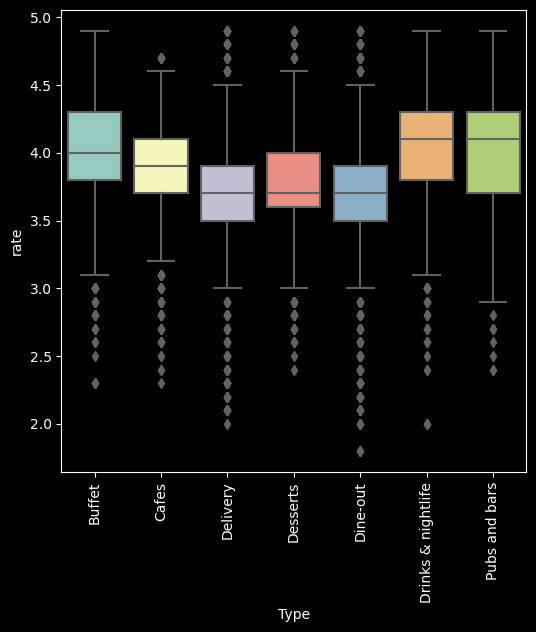

In [147]:
plt.figure(figsize=(6,6))
ax= sns.boxplot(x=df["Type"],y=df['rate'])
plt.xticks(rotation=90)


=>max avg rating is given to Drinks & nightlife


## Grouping types with location

In [149]:
df3=df.groupby(['location','Type'])['name'].count()
print(df3)
df3.to_csv('location_types.csv')
df3=pd.read_csv('location_types.csv')
df3=pd.pivot_table(df3,values=None,index='location',columns=['Type'])
df3


location  Type              
BTM       Buffet                  21
          Cafes                   83
          Delivery              3053
          Desserts               198
          Dine-out              1660
                                ... 
others    Delivery              2787
          Desserts               276
          Dine-out              1553
          Drinks & nightlife      75
          Pubs and bars           47
Name: name, Length: 280, dtype: int64


name                                    \
Type                  Buffet  Cafes Delivery Desserts Dine-out   
location                                                         
BTM                     21.0   83.0   3053.0    198.0   1660.0   
Banashankari             7.0   36.0    418.0     71.0    356.0   
Banaswadi                NaN   24.0    310.0     37.0    262.0   
Bannerghatta Road        9.0   46.0    828.0    137.0    578.0   
Basavanagudi             7.0   11.0    344.0     66.0    251.0   
Bellandur               28.0   36.0    617.0     75.0    479.0   
Brigade Road            25.0   46.0    497.0    108.0    455.0   
Brookefield              6.0   17.0    339.0     45.0    245.0   
Church Street           19.0   51.0    193.0     29.0    215.0   
Commercial Street        NaN   13.0    121.0     77.0    159.0   
Cunningham Road         29.0   34.0    194.0     26.0    184.0   
Domlur                  15.0   13.0    261.0     35.0    135.0   
Ejipura                  NaN    NaN    245.0     16.0    172.0   
Electronic City         23.0   24.0    570.0     71.0    516.0   
Frazer Town              1.0   11.0    470.0     56.0    172.0   
HSR                     19.0   49.0   1694.0    120.0    580.0   
Indiranagar             38.0   97.0   1091.0    140.0    529.0   
JP Nagar                45.0   76.0   1151.0    166.0    722.0   
Jayanagar               27.0   77.0   1043.0    182.0    575.0   
Kalyan Nagar             9.0   45.0    366.0     88.0    315.0   
Kammanahalli             2.0   27.0    329.0     35.0    240.0   
Koramangala 1st Block    3.0   26.0    716.0     70.0    398.0   
Koramangala 4th Block   21.0   53.0    464.0     81.0    302.0   
Koramangala 5th Block   65.0  146.0   1075.0    209.0    842.0   
Koramangala 6th Block   18.0   43.0    511.0     70.0    411.0   
Koramangala 7th Block   25.0   52.0    503.0    127.0    417.0   
Lavelle Road            30.0   27.0    127.0     50.0    191.0   
MG Road                 51.0   76.0    266.0     68.0    343.0   
Malleshwaram            11.0   31.0    269.0     85.0    291.0   
Marathahalli            34.0   32.0    980.0    105.0    630.0   
New BEL Road             4.0   29.0    338.0     33.0    224.0   
Old Airport Road        12.0    5.0    200.0     35.0    164.0   
Rajajinagar             10.0    4.0    258.0     55.0    251.0   
Residency Road          20.0   31.0    187.0     63.0    289.0   
Richmond Road           63.0   21.0    257.0     78.0    356.0   
Sarjapur Road           25.0   22.0    558.0     82.0    319.0   
Shanti Nagar             9.0   22.0    198.0     39.0    229.0   
Shivajinagar             6.0   17.0    143.0     37.0    280.0   
St. Marks Road           5.0   10.0    111.0     10.0    145.0   
Ulsoor                  16.0   56.0    456.0     71.0    359.0   
Whitefield              28.0   51.0   1041.0    137.0    768.0   
others                  83.0  133.0   2787.0    276.0   1553.0   

                                                        
Type                  Drinks & nightlife Pubs and bars  
location                                                
BTM                                 22.0          19.0  
Banashankari                        14.0           NaN  
Banaswadi                            6.0           1.0  
Bannerghatta Road                    9.0           2.0  
Basavanagudi                         5.0           NaN  
Bellandur                           17.0          16.0  
Brigade Road                        57.0          22.0  
Brookefield                          4.0           NaN  
Church Street                       36.0          23.0  
Commercial Street                    NaN           NaN  
Cunningham Road                     16.0           7.0  
Domlur                              12.0          11.0  
Ejipura                              NaN           NaN  
Electronic City                     21.0          21.0  
Frazer Town                          2.0           2.0  
HSR                        

<Axes: xlabel='location'>

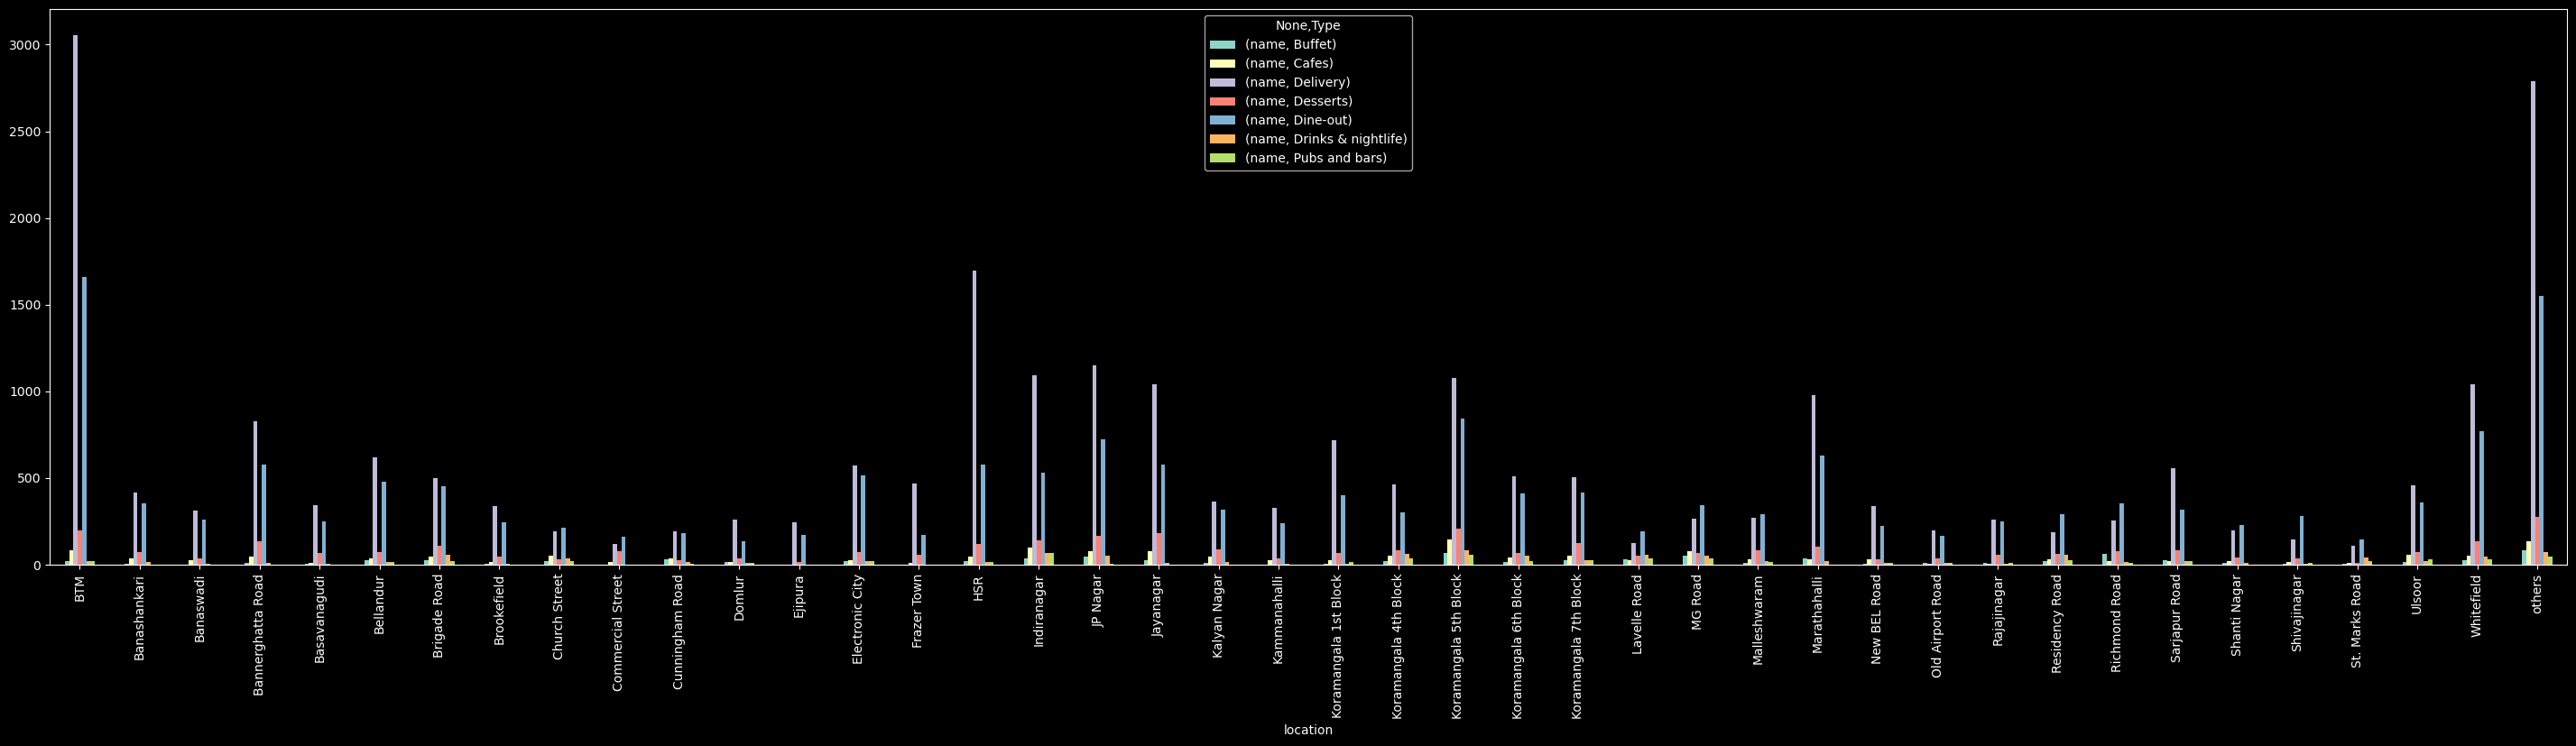

In [152]:
df3.plot(kind='bar',figsize=(36,8))

=>if want to open pub and bar should prefer shivaji nager since no pub/bar is their

## Visualize Votes location wise

In [158]:
df4=df.groupby(['location'])['votes'].sum()
print(df4)
df4=df4.to_frame()

location
BTM                       573668
Banashankari              162374
Banaswadi                  34845
Bannerghatta Road         214989
Basavanagudi               94919
Bellandur                 205308
Brigade Road              426682
Brookefield               118962
Church Street             590306
Commercial Street          25563
Cunningham Road           287471
Domlur                     96721
Ejipura                    17015
Electronic City           110774
Frazer Town                97668
HSR                       498322
Indiranagar              1165909
JP Nagar                  586522
Jayanagar                 487044
Kalyan Nagar              167992
Kammanahalli              105250
Koramangala 1st Block     251681
Koramangala 4th Block     685156
Koramangala 5th Block    2214083
Koramangala 6th Block     463503
Koramangala 7th Block     488225
Lavelle Road              495777
MG Road                   428266
Malleshwaram              238967
Marathahalli              434235
N

,votes
location,
BTM,573668
Banashankari,162374
Banaswadi,34845
Bannerghatta Road,214989
Basavanagudi,94919
Bellandur,205308
Brigade Road,426682
Brookefield,118962
Church Street,590306


<Axes: xlabel='location'>

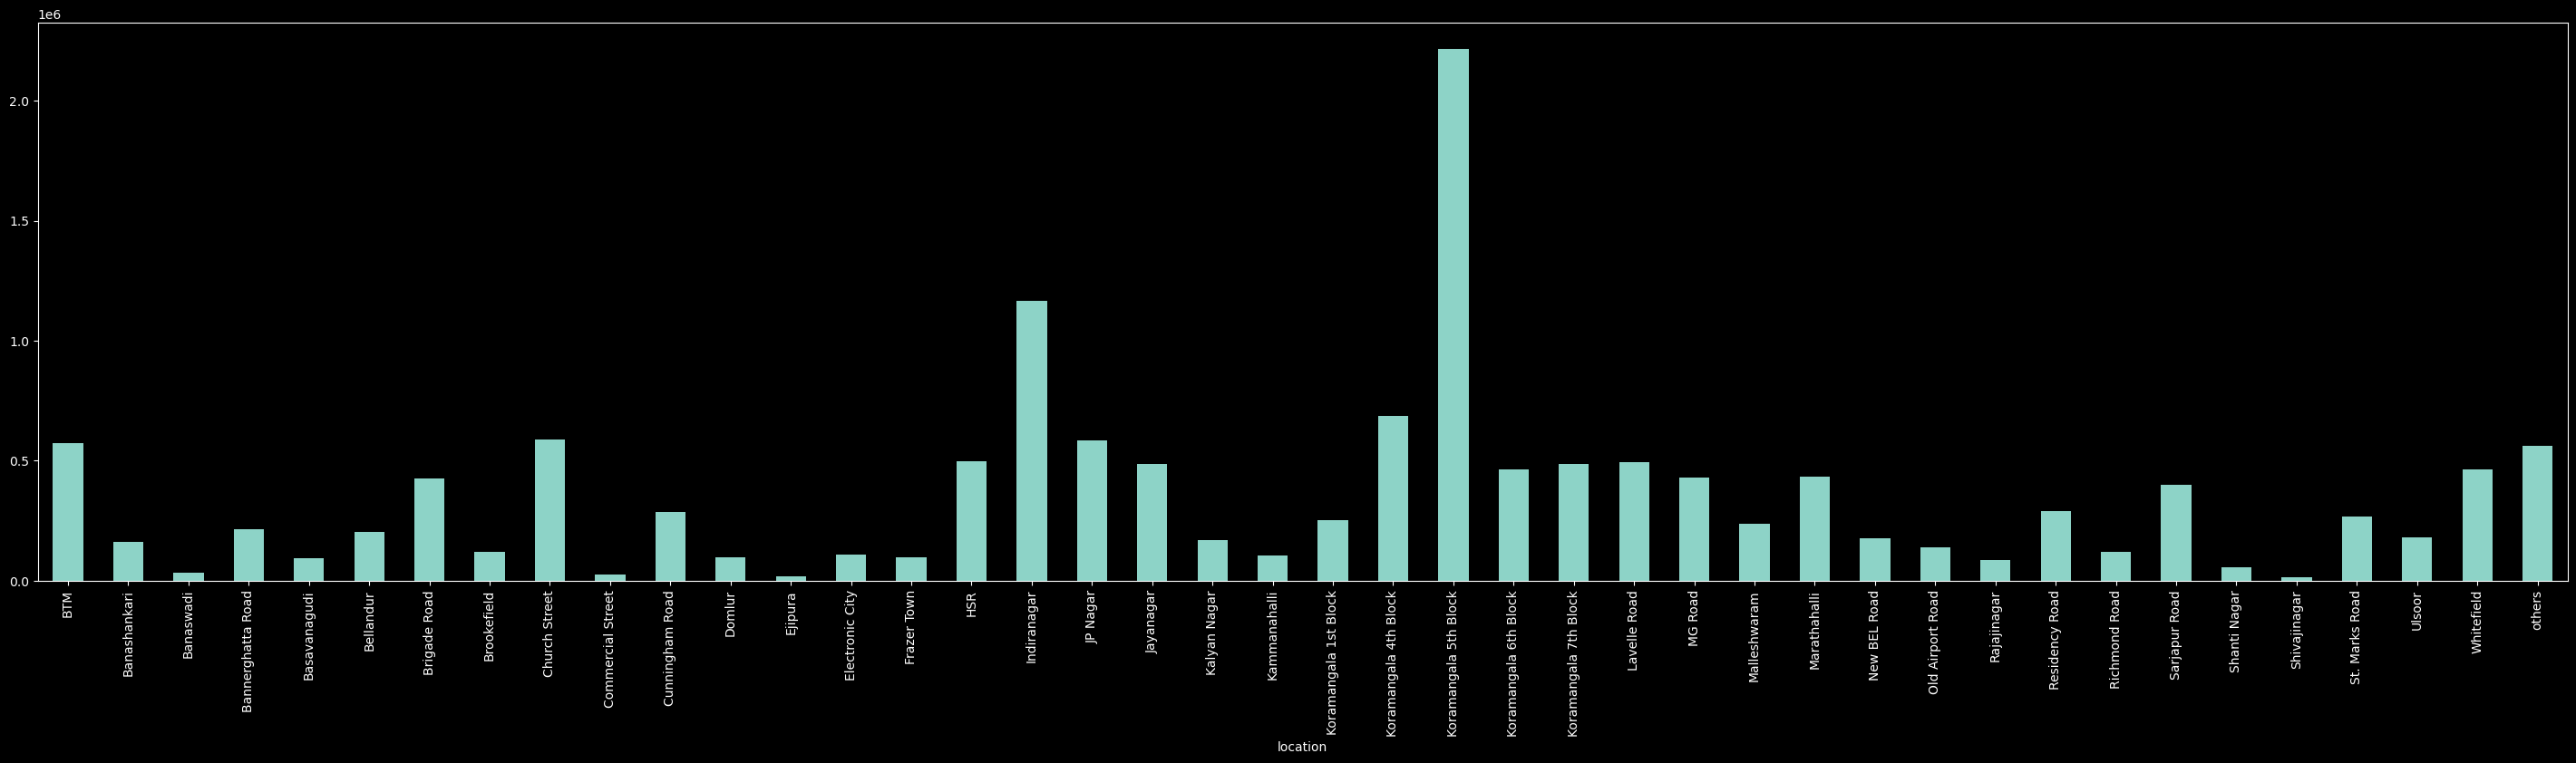

In [165]:
df4.plot(kind='bar',figsize=(36,8))

=>In koramangalam and indianagar people likes to vote whereas in Ejipura peopledont like to vote tis may be due to the no. of resturants

## Visulize Cuisine voting

In [176]:
df5=df.groupby(['cuisines'])['votes'].sum()
print(df5)
df5=df5.drop('others')
df5=df5.to_frame()
df5

cuisines
Andhra                                                 12299
Andhra, Biryani                                        40339
Arabian                                                16529
Bakery                                                 13148
Bakery, Desserts                                       45464
                                                      ...   
South Indian, North Indian                             14250
South Indian, North Indian, Chinese                    53586
South Indian, North Indian, Chinese, Street Food       33636
Street Food                                            11877
others                                              11542182
Name: votes, Length: 70, dtype: int64


,votes
cuisines,
Andhra,12299
"Andhra, Biryani",40339
Arabian,16529
Bakery,13148
"Bakery, Desserts",45464
...,...
"South Indian, Fast Food",8310
"South Indian, North Indian",14250
"South Indian, North Indian, Chinese",53586


<Axes: xlabel='cuisines'>

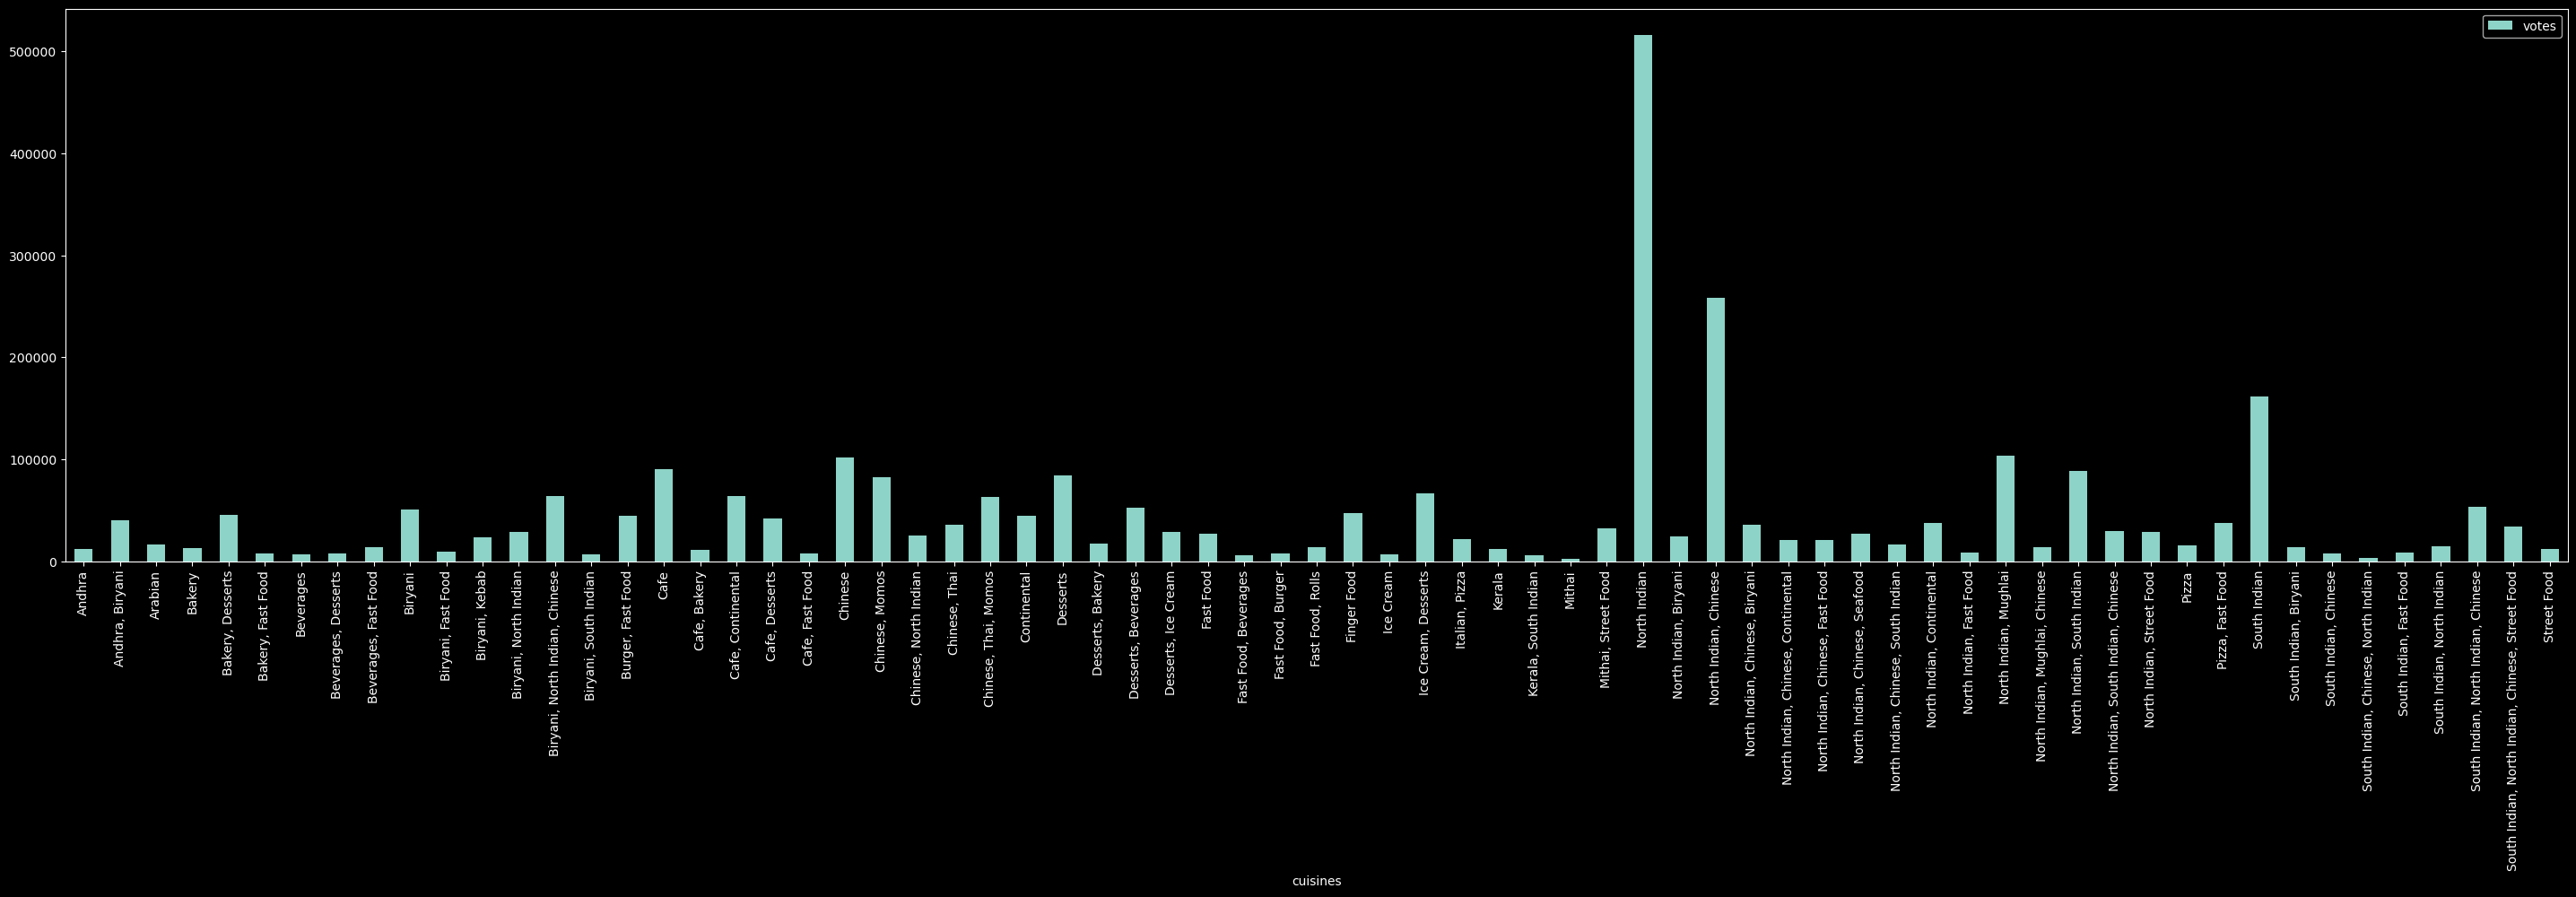

In [175]:
df5.plot(kind='bar',figsize=(36,8))

=> to North-indian maximum no. of votes are given then to Chinese